In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/dc_motor_data.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,class
0,2.913200e-06,-5.247700e-06,0.000003,-6.056100e-06,2.778900e-06,-3.752400e-06,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
1,-9.584900e-07,5.214300e-08,-0.000047,6.453700e-07,-2.304100e-06,5.499900e-05,0.031154,0.031154,0.031201,-0.032789,...,-0.61124,5.8337,18.6970,-1.4956,-1.4956,-1.4956,-1.4973,-1.4972,-1.4973,1
2,-2.566600e-06,-1.679500e-07,0.000015,-1.598400e-06,8.709200e-07,1.496100e-05,0.031071,0.031071,0.031056,-0.029695,...,-0.63618,12.8380,4.9079,-1.4990,-1.4990,-1.4990,-1.4968,-1.4968,-1.4968,1
3,2.825600e-06,6.067600e-06,0.000118,-4.347500e-06,1.492300e-06,-2.917100e-06,0.030947,0.030941,0.030823,-0.032171,...,-0.58170,2.0511,8.8939,-1.4963,-1.4963,-1.4963,-1.4943,-1.4943,-1.4943,1
4,-6.573800e-07,-3.951900e-07,0.000032,-5.296100e-06,-1.605800e-06,7.566000e-07,0.029416,0.029416,0.029385,-0.028420,...,-0.59578,5.3394,13.3550,-1.4984,-1.4984,-1.4984,-1.4970,-1.4970,-1.4970,1


In [5]:
target = df['class']
features = df.drop(columns=['class'])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484
           2       0.99      0.99      0.99       528
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       538
           5       1.00      0.99      1.00       552
           6       1.00      1.00      1.00       546
           7       1.00      1.00      1.00       501
           8       1.00      1.00      1.00       520
           9       1.00      1.00      1.00       574
          10       0.99      0.99      0.99       552
          11       1.00      1.00      1.00       525

    accuracy                           1.00      5851
   macro avg       1.00      1.00      1.00      5851
weighted avg       1.00      1.00      1.00      5851

[[483   0   0   0   0   1   0   0   0   0   0]
 [  0 524   0   0   0   0   0   0   1   2   1]
 [  0   0 531   0   0   0   0   0   0   0   0]
 [  0   0   0 538   0   0   0   0   0   0   0]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484
           2       0.99      0.99      0.99       528
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       538
           5       1.00      0.99      1.00       552
           6       1.00      1.00      1.00       546
           7       1.00      1.00      1.00       501
           8       1.00      1.00      1.00       520
           9       1.00      1.00      1.00       574
          10       0.99      0.99      0.99       552
          11       1.00      1.00      1.00       525

    accuracy                           1.00      5851
   macro avg       1.00      1.00      1.00      5851
weighted avg       1.00      1.00      1.00      5851

[[483   0   0   0   0   1   0   0   0   0   0]
 [  0 524   0   0   0   0   0   0   1   2   1]
 [  0   0 531   0   0   0   0   0   0   0   0]
 [  0   0   0 538   0   0   0   0   0   0   0]

In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize RandomForestClassifier (without scaling)
rf_grid = RandomForestClassifier(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(rf_grid, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_grid = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))
print(accuracy_score(y_test, y_pred_grid))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.996795397667715
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484
           2       0.99      0.99      0.99       528
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       538
           5       1.00      0.99      1.00       552
           6       1.00      1.00      1.00       546
           7       1.00      1.00      1.00       501
           8       1.00      1.00      1.00       520
           9       1.00      1.00      1.00       574
          10       0.99      0.99      0.99       552
          11       1.00      1.00      1.00       525

    accuracy                           1.00      5851
   macro avg       1.00      1.00      1.00      5851
weighted avg       1.00      1.00      1.00      5851

[[483   0   0   0   0   1   0   0   0   0   0]
 [  0 52

Add Feature Importance, LIME, SHAP

In [10]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import numpy as np

# Apply PCA (fit on training data)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Use RFE to select the best number of PCA features
rf_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
# We'll try all possible numbers of features and pick the best by cross-validation score

scores = []
n_features_range = range(1, X_train_pca.shape[1] + 1, 5)  # step by 5 for speed
for n_features in n_features_range:
    rfe = RFE(rf_rfe, n_features_to_select=n_features, step=5)
    X_rfe = rfe.fit_transform(X_train_pca, y_train)
    cv_score = cross_val_score(rf_rfe, X_rfe, y_train, cv=3, scoring='accuracy').mean()
    scores.append(cv_score)

best_n_features = n_features_range[np.argmax(scores)]
print(f"Best number of PCA features selected by RFE: {best_n_features}")

# Fit RFE with the best number of features
rfe = RFE(rf_rfe, n_features_to_select=best_n_features, step=5)
X_train_pca_rfe = rfe.fit_transform(X_train_pca, y_train)
X_test_pca_rfe = rfe.transform(X_test_pca)

# Train and evaluate RandomForest on selected features
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_pca_rfe, y_train)
y_pred_rfe = rf_final.predict(X_test_pca_rfe)

print(classification_report(y_test, y_pred_rfe))
print(confusion_matrix(y_test, y_pred_rfe))
print(accuracy_score(y_test, y_pred_rfe))

Best number of PCA features selected by RFE: 16
              precision    recall  f1-score   support

           1       0.88      0.94      0.91       484
           2       0.90      0.91      0.91       528
           3       0.90      0.93      0.91       531
           4       0.96      0.97      0.97       538
           5       0.89      0.81      0.85       552
           6       0.87      0.85      0.86       546
           7       0.99      1.00      0.99       501
           8       0.87      0.91      0.89       520
           9       0.94      0.91      0.92       574
          10       0.92      0.90      0.91       552
          11       1.00      1.00      1.00       525

    accuracy                           0.92      5851
   macro avg       0.92      0.92      0.92      5851
weighted avg       0.92      0.92      0.92      5851

[[456   0   0   0   0  20   0   0   8   0   0]
 [  0 482   0   0   0   1   2   0   1  41   1]
 [  0   0 492   1  21   7   0   9   0   1   0

In [11]:
# Use RFE with the original (scaled) features
rfe_orig = RFE(rf_rfe, n_features_to_select=best_n_features, step=5)
X_train_rfe = rfe_orig.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe_orig.transform(X_test_scaled)

rf_rfe_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rfe_orig.fit(X_train_rfe, y_train)
y_pred_rfe_orig = rf_rfe_orig.predict(X_test_rfe)

print(classification_report(y_test, y_pred_rfe_orig))
print(confusion_matrix(y_test, y_pred_rfe_orig))
print(accuracy_score(y_test, y_pred_rfe_orig))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484
           2       0.99      0.99      0.99       528
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       538
           5       1.00      0.99      0.99       552
           6       0.99      1.00      1.00       546
           7       1.00      1.00      1.00       501
           8       1.00      1.00      1.00       520
           9       1.00      0.99      1.00       574
          10       1.00      0.99      0.99       552
          11       1.00      1.00      1.00       525

    accuracy                           1.00      5851
   macro avg       1.00      1.00      1.00      5851
weighted avg       1.00      1.00      1.00      5851

[[483   0   0   0   0   1   0   0   0   0   0]
 [  0 525   0   0   0   0   0   0   1   1   1]
 [  0   0 531   0   0   0   0   0   0   0   0]
 [  0   0   0 538   0   0   0   0   0   0   0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484
           2       0.99      0.99      0.99       528
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       538
           5       1.00      0.99      1.00       552
           6       1.00      1.00      1.00       546
           7       1.00      1.00      1.00       501
           8       1.00      1.00      1.00       520
           9       1.00      1.00      1.00       574
          10       0.99      0.99      0.99       552
          11       1.00      1.00      1.00       525

    accuracy                           1.00      5851
   macro avg       1.00      1.00      1.00      5851
weighted avg       1.00      1.00      1.00      5851

[[483   0   0   0   0   1   0   0   0   0   0]
 [  0 524   0   0   0   0   0   0   1   2   1]
 [  0   0 531   0   0   0   0   0   0   0   0]
 [  0   0   0 538   0   0   0   0   0   0   0]

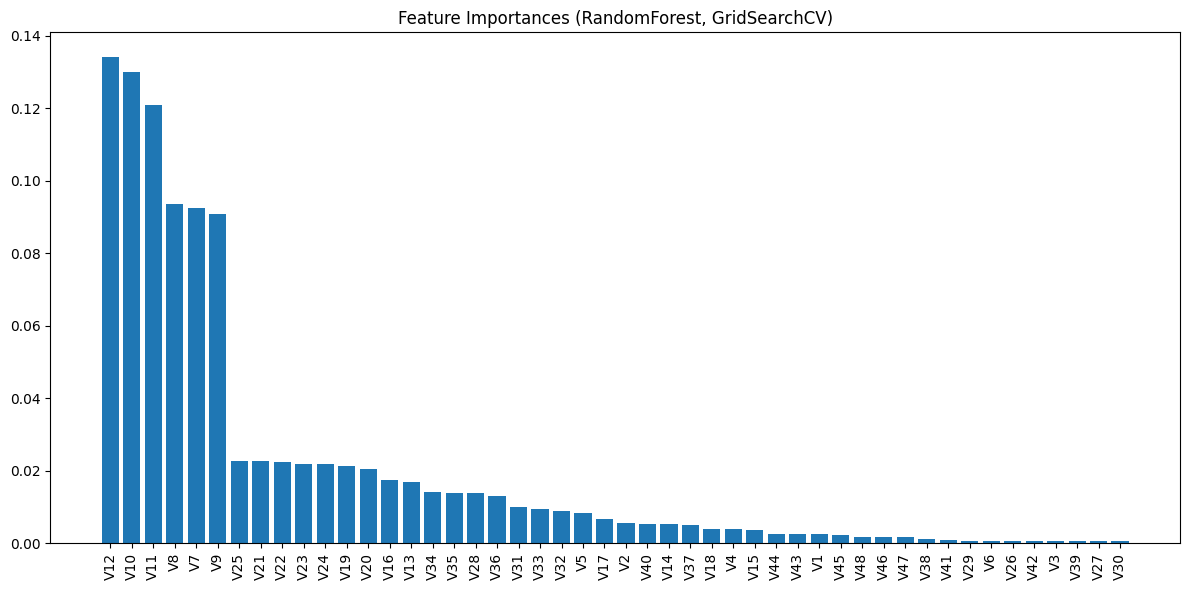

In [13]:
import numpy as np

import matplotlib.pyplot as plt

# Get feature importances from the best_rf (from GridSearchCV)
importances = best_rf.feature_importances_
feature_names = features.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (RandomForest, GridSearchCV)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       484
           2       0.99      1.00      0.99       528
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       538
           5       1.00      0.99      0.99       552
           6       0.99      0.99      0.99       546
           7       1.00      1.00      1.00       501
           8       0.99      1.00      0.99       520
           9       0.99      0.99      0.99       574
          10       1.00      0.99      1.00       552
          11       1.00      1.00      1.00       525

    accuracy                           0.99      5851
   macro avg       0.99      0.99      0.99      5851
weighted avg       0.99      0.99      0.99      5851

0.9945308494274483


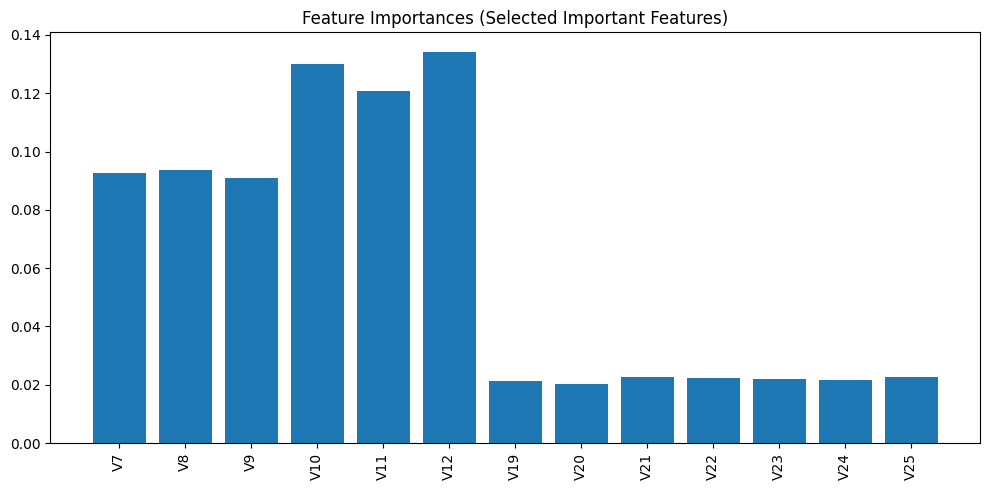

In [ ]:
# Select features with importance > 0.02 from the best_rf
important_indices = np.where(importances > 0.02)[0]
important_feature_names = feature_names[important_indices]

# Subset the training and test data
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

# Train a new RandomForestClassifier
rf_important = RandomForestClassifier(n_estimators=100, random_state=42)
rf_important.fit(X_train_important, y_train)
y_pred_important = rf_important.predict()

print(classification_report(y_test, y_pred_important))
print(accuracy_score(y_test, y_pred_important))

# Plot feature importances for the selected important features
import matplotlib.pyplot as plt

important_importances = importances[important_indices]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances (Selected Important Features)")
plt.bar(range(len(important_importances)), important_importances, align="center")
plt.xticks(range(len(important_importances)), important_feature_names, rotation=90)
plt.tight_layout()
plt.show()


In [16]:
import shap

explainer = shap.TreeExplainer(rf_important)
shap_values = explainer.shap_values(X_test_important)

/home/timo/Visual-Analytics-SoSe-25/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


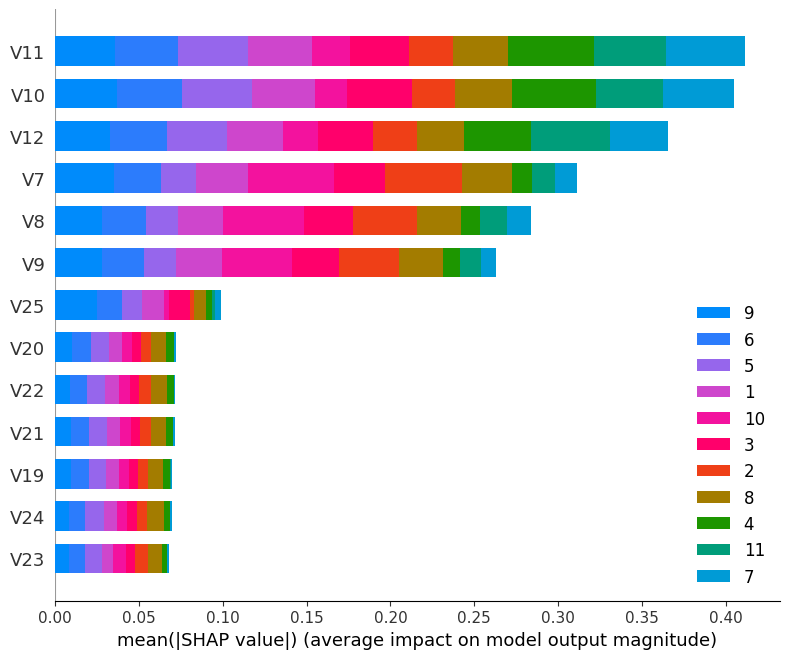

<Figure size 1400x1000 with 0 Axes>

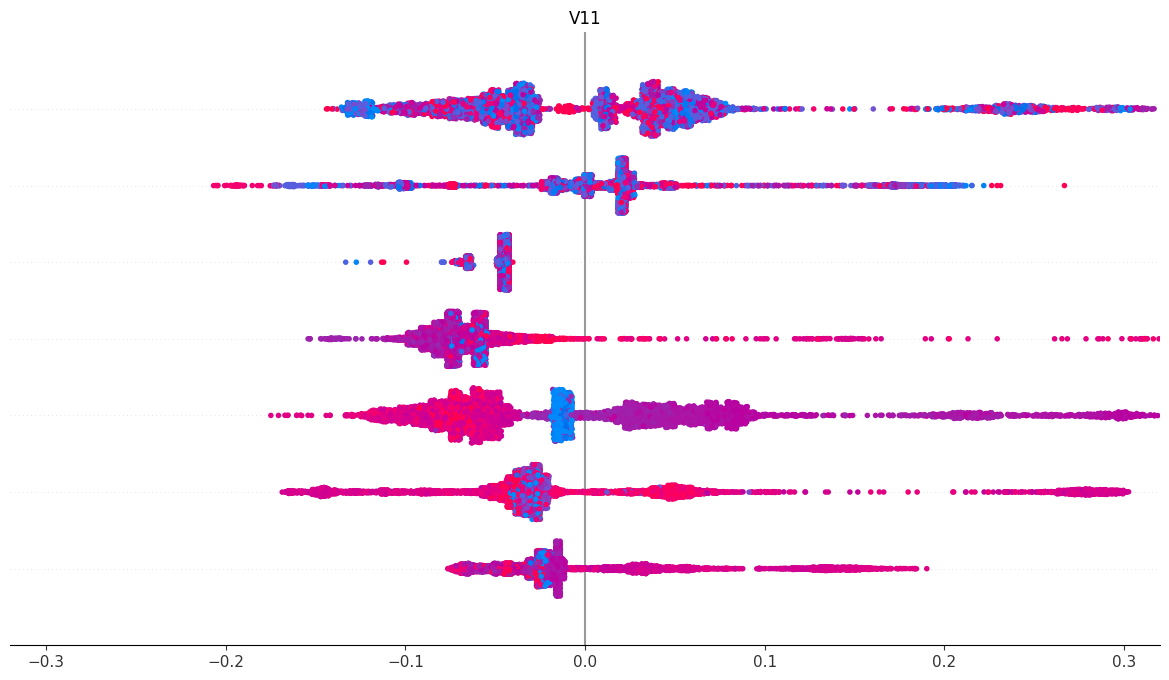

IndexError: index 13 is out of bounds for axis 0 with size 13

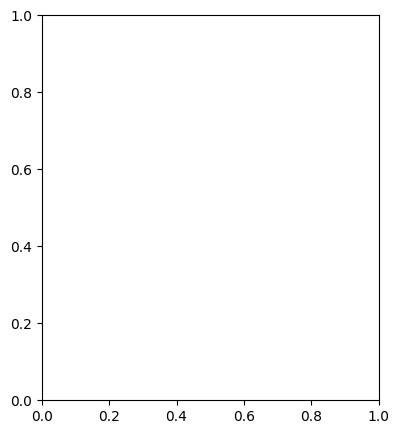

In [20]:
# Plot SHAP values summary
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_important, plot_type="bar", class_names=sorted(target.unique()))

# Plot detailed SHAP summary (beeswarm plot)
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_test_important)

# Plot SHAP dependence plots for top 4 features
plt.figure(figsize=(20, 5))
for i, name in enumerate(important_feature_names[:4]):
    plt.subplot(1, 4, i+1)
    shap.dependence_plot(i, shap_values[0], X_test_important, feature_names=important_feature_names, show=False)
    plt.tight_layout()
plt.suptitle("SHAP Dependence Plots for Top Features (Class 0)", y=1.05)
plt.tight_layout()
plt.show()

# Create a sample force plot for a specific instance
plt.figure(figsize=(20, 3))
# Choose first instance
sample_idx = 0
# Plot force plot for prediction of most likely class for this instance
most_likely_class = np.argmax([shap_values[c][sample_idx].sum() for c in range(len(shap_values))])
shap.force_plot(explainer.expected_value[most_likely_class], 
                shap_values[most_likely_class][sample_idx], 
                X_test_important.iloc[sample_idx],
                matplotlib=True)
plt.tight_layout()
plt.show()

In [21]:
import lime

import lime.lime_tabular

# Create a LIME explainer for the important features
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_important.values,
    feature_names=important_feature_names.tolist(),
    class_names=[str(cls) for cls in sorted(target.unique())],
    mode='classification'
)

# Explain a prediction for a single instance (e.g., the first test sample)
idx = 0
exp = lime_explainer.explain_instance(
    X_test_important.iloc[idx].values,
    rf_important.predict_proba,
    num_features=10
)

# Show the explanation
exp.show_in_notebook(show_table=True)

/home/timo/Visual-Analytics-SoSe-25/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
